1280.0 720.0 4366



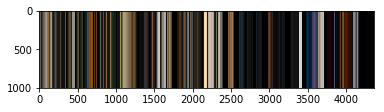

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio
import os
def getColor(frame):
    height, width, depth = frame.shape
    y = height//2
    x = width//2
    
    color = frame[y, x]
    return color


file_name='C:\\Users\\MASTER\\DESKTOP\\Interstellar - Trailer - Official Warner Bros. UK.mp4'

presence = os.path.isfile(file_name)
#clip data
cap = cv2.VideoCapture(file_name) 
fwidth = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
fheight = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
fcount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(fwidth, fheight, fcount)


#if the file name is wrong, quits it
if presence==False:
    print('File name error')
    quit()
    
else:
    colors = []
    while(True):
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        
        if ret == False:
            break
        
        colors.append(getColor(frame))
    

#image 
img = np.zeros((1000,fcount,3))
#colors it with loop
for i in range(fcount):
    img[:,i] = colors[i]

b, g, r = cv2.split(img)
print()
img2 = cv2.merge([r,g,b])
print()
img2 = img2.astype(np.uint8)
plt.imshow(img2)
plt.show()

imageio.imwrite('my thing.png', img2)

        
        

      


# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


    The goal of this project is to analyze a given movie frame by frame and based on that analysis, create an image that represents the whole movie. In doing so, a convincing analysis logic both in color representation and effiency was needed and the final output would vary upon different representaion methods. However when overthinking accuracy, it's easy to loosen the grip of rendering efficiency. I chose to go with the faster rendering option and made the color selecting process simple.

    Overall mechanism is simple. 1. Bring frames using opencv. 2. Create an image using plt.
    
    These are the following modules imported
    - numpy # sorts multi dimension arrays 
    - matplotlib.pyplot # plot images  
    - cv2 # open video informations
    - imageio # save output
    - os # enables system management
    
    'getColor()' function is used to pick a representitive color of each frame. It is supposed to pick the color of the frame in the dead center. There were obviously better options to go with such as the adverage rgb color of each pixel but this seemed like too much of a complicated process. Simple and easy, having the center pixel as a representitive color seemed ok.
    
    When a variable(which is going to be each and every frame of the video) is put into the function, it returns a representitive color. '.shape' saves the movie's height, width and depth information. With this data, variable y and x points out the coordinate of the frame's center. Using y and x, variable color is defined as a form of numpy array. 
    
    'file_name' is the path of the clip. I've added a touch to quit the system when 'file_name' doesn't exist. 'presence' variable detects whether there really is a file in the path.  
    
    'cv2.VideoCapture()' makes a capture object of a clip that's inside the bracket and is saved as 'cap'. fheight, fwidth, fcount are all defined by '.get(cv2.CAP_PROP_FRAME_XXXX)' as this method brings size and frame information. I've added int() in fcount because number of frames come as integers and later when calling the variable,it has to be in an integer form to function.
    
    After these basic presets, now's time to paint the image.
    
    The system either quits the process if 'file_name' is invalid or it properly starts to paint when it finds the clip.
    
    List 'colors' is for collecting all center pixel's rgb numpy arrarys.
    
    Entering the while loop, we begin to put things into work. With '.read()', frame by frame the loop collects boolean validity of a frame as 'ret' and stocks images of frame as 'frame'. If 'ret' turns out to be false then the loop ends as it means that there aren't any frames in the clip left. But when 'ret' is true, the loop calls getColor() function and appends the numpy array to 'colors' list.
    
    When the loop ends a plain image of 1000 x the number of frames with rgb depth is created as 'img' with 'np.zeros((1000,fcount,3))'. 
    
    For loop colors 'img' with each frame's color. It colors the whole y axis and a single x axis of 'img' with the represented color until all frames are considered. 
    
    However even though 'img' is fully colored, there are some extra steps to be made. Since opencv runs color arrangement as bgr, an image convertion to rgb has to be made. Therefore using '.split()' we individually take apart the 3 color channels and reconfigure it with an rgb setting, defining it as 'img2'. Then a change in data type is needed within the numpy array to uint8 in order to display the output. 
    
    The image is shown by the following two commands and with imageio, the image is saved.
    
    'release()' method closes the opened file and 'destroyAllWindows()' closes open windows.

    I chose the Interstellar trailer as a clip source and I think it came out pretty nice. The image had a overall dark tone (cause space obviously) and depictions of the corn farm scene and the water planet scence were observable. Later if possible, it'd be better to find a better balance between accuracy and efficiency.